<a href="https://colab.research.google.com/github/nlnlvlc/big_data/blob/main/Slack_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import datetime
import math

In [ ]:
#use if using json file from slackDump
def processSlackDump(jsonPath: str) -> pd.DataFrame:

  with open(jsonPath) as json_file:
    data = json.load(json_file)

  dataDF = pd.DataFrame(data)

  #transpose dataframe so date can be used as index
  dataDF = dataDF.transpose()

  #if there is a non-datetime row (Total) at the end of dataframe
  #uncomment line below to remove
  dataDF = dataDF.iloc[:-1]

  dataDF.head(20)

  return dataDF


In [ ]:
#exports dataframe table to excel spreadsheet
def export_xlsx(df: pd.DataFrame, destPath: str):
  df.to_excel(destPath)

In [ ]:
#use if slack data was copy, pasted, and formated form slacked, manually
def processCaP(fileName: str) -> pd.DataFrame:
  data = pd.read_excel(fileName)
  data.head(20)

  ryan = "Ryan Yam (rty2051)"
  klim = "Klim Fedorchuk (kf2848)"
  nilan = "Nilan Lovelace (njl8879)"
  josh = "Joshua Radford (jsr6181)"

  ryan_df = data[data['User'] == ryan]
  klim_df = data[data['User'] == klim]
  nilan_df = data[data['User'] == nilan]
  josh_df = data[data['User'] == josh]

  dfs = [ryan_df, klim_df, nilan_df, josh_df]

  tables = []

  for df in dfs:
    name = df['User'].iloc[0]
    num = len(df)
    length = df['Message Content'].str.len().sum()
    days = len(set(df['Date']))
    avgLength = length/num
    dates = sorted(list(set(df['Date'])))
    ind_msgs = []

    user_dict = {'Name': name, "Dates": days}

    for day in dates:
      temp_df = df[df['Date'] == day]
      temp_num = len(temp_df)

      user_dict[day] = temp_num

    tables.append(user_dict)

  new = pd.DataFrame.from_records(tables).fillna(0)

  daily = new.drop(['Message Count'], axis=1)
  daily.set_index('Name', inplace=True)
  daily.fillna(0)
  daily = daily.transpose()
  daily.head()

  daily.to_excel('/content/daily_posts.xlsx')

In [ ]:
#use if table made manually
#table should have Date, Ryan, Joshua, Klim, and Nilan columns
#Date column should be in Datetime or string format

def processManual(fileName: str) -> pd.DataFrame:
  data = pd.read_excel(fileName)

  #if Date in Datetime format, uncomment line below
  #data["Date"] = data["Date"].dt.strftime("%Y-%-m-%-d")

  data.set_index("Date", inplace=True)

  return data



In [ ]:
#Get GA2 data
#ga2_df = processSlackDump('/content/msg_count.json')

#GA3 data
#ga3_df = processSlackDump('/content/msg_count2.json')

#GA4 data
ga4_df = processManual('/content/slackdata.xlsx')

In [ ]:
ga4_df.head()

,Nilan,Joshua,Ryan,Klim
Date,,,,
2024-11-14,0,0,0,4
2024-11-15,0,0,1,1
2024-11-16,14,0,0,22
2024-11-17,0,0,0,0
2024-11-18,2,7,0,0


In [ ]:
#export discussion table for GA2
#export_xlsx(ga2_data, '/content/daily_GA2_posts.xlsx')

#export discussion table for GA3
#export_xlsx(ga3_data, '/content/daily_GA3_posts.xlsx')

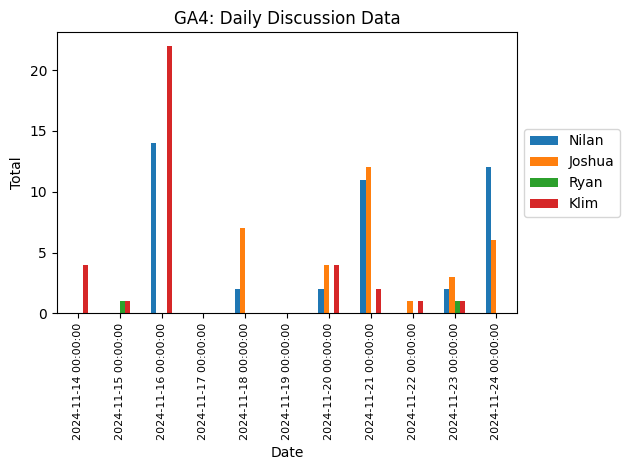

In [ ]:
#produces frequency bar plot
def plotFrame(df: pd.DataFrame, title: str):

    ax = df.plot(kind='bar', legend=True, stacked = False)
    ax.tick_params(axis='x', rotation=90, labelsize=8)
    ax.margins(x=0.05)
    ax.set_xticks(range(len(df.index)))
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_xlabel("Date")
    ax.set_ylabel("Total")
    ax.set_title(title)

    plt.tight_layout()
    plt.show()

#uncomment line below for GA2 plot
#plotFrame(ga2_df, "GA2: Daily Discussion Data")

#uncomment line below for GA3 plot
#plotFrame(ga3_df, "GA3: Daily Discussion Data")

plotFrame(ga4_df, "GA4: Daily Discussion Data")